# Bayesian Neural Networks 

In [1]:
import torch
from torch import nn
from torch.utils.cpp_extension import load
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Nice dark plotting settings
import seaborn as sns
sns.set_style('darkgrid',
                {'axes.facecolor': '.2',
                'figure.facecolor': '0.1',
                'text.color': '.9',
                'grid.color': '.5',
                'xtick.color': '.9',
                'ytick.color': '.9'})

In [3]:
N_tr = 6
N_val = 300

x_val = torch.linspace(-5,5,N_val).view(-1,1)
y_val = torch.sin(x_val).view(-1,1)

x_train = torch.linspace(-3.14,3.14,N_tr).view(-1,1)
y_train = torch.sin(x_train).view(-1,1) + torch.randn_like(x_train)*0.1

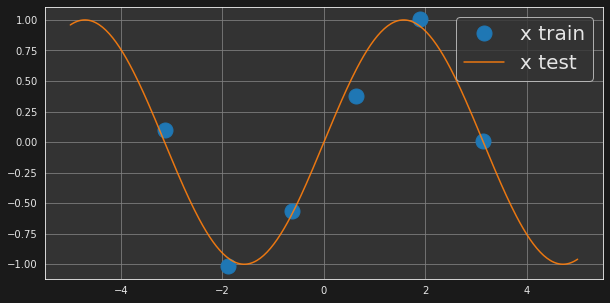

In [4]:
plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'.',markersize=30, label='x train')
plt.plot(x_val.numpy(),y_val.numpy(),'C1',alpha=0.9, markersize=2, label='x test')

plt.legend(fontsize=20)
plt.show()

In [62]:
class Net(torch.nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        self.l1 = nn.Linear(1, 10, bias = True)
        self.l2 = nn.Linear(10, 10, bias = True)
        self.l3 = nn.Linear(10, 1, bias = True)

    def forward(self, x):
        x = self.l1(x)
        x = torch.relu(x)
        x = self.l2(x)
        x = torch.relu(x)
        x = self.l3(x)
        return x

net = Net()
jit_net = torch.jit.script(net)

In [63]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.005)
N = 251

In [64]:
preds = []    
for i in range(N):
    # Compute prediction and loss
    pred = net(x_train)
    loss = loss_fn(pred, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 50 == 0:
        print(f"Iteration {i} loss: {loss.item():>7f}")
        
    preds.append(net(x_val).detach().clone())

Iteration 0 loss: 0.403013
Iteration 50 loss: 0.087397
Iteration 100 loss: 0.000505
Iteration 150 loss: 0.000013
Iteration 200 loss: 0.000000
Iteration 250 loss: 0.000000


In [65]:
predictions = torch.stack(preds)

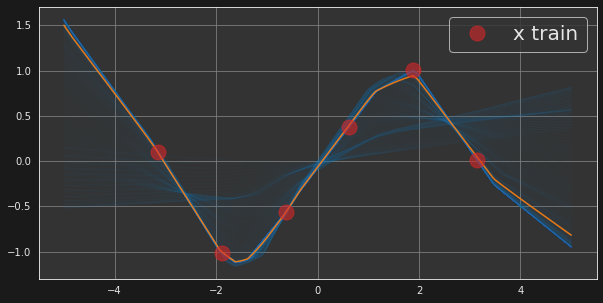

In [66]:
plt.figure(figsize=(10,5))
plt.plot(x_val.numpy(), predictions.numpy().squeeze().T, 'C0',alpha=0.051)
plt.plot(x_val.cpu().numpy(),predictions[50:].mean(0).numpy().squeeze().T, 'C1',alpha=0.9)
plt.plot(x_train.numpy(), y_train.numpy(),'.C3',markersize=30, label='x train',alpha=0.6)
plt.legend(fontsize=20)
plt.show()

In [ ]:
bnets = load(name='bayesian_nets',
             sources=['bayesian_nets.cc'],
             extra_include_paths=['../../include'],
             extra_cflags=['-Wall -Wextra -Wpedantic -O3 -std=c++1z'],
             verbose=True)

In [ ]:
help(bnets.run_ghmc)

In [ ]:
sample = bnets.run_ghmc()

In [ ]:
torch.std_mean(sample, 0, keepdim=True)